**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopzs)** or **[LinkedIn](https://linkedin.com/in/jsulopzs)**

# #01 | Machine Learning & Linear Regression

## Chapter Importance

Machine Learning is all about calculating [the best numbers](https://twitter.com/sotastica/status/1449735653328031745) of a mathematical equation by [minimizing the distance between real data and predictions](https://www.youtube.com/watch?v=Ht3rYS-JilE).

The form of a Linear Regression mathematical equation is as follows:

$$
y = (a) + (b) \cdot x
$$

As we see in the following plot, **not any mathematical equation is valid**; the red line doesn't fit the real data (blue points) as well as the green one.

<center>
<img src="src/linear-regression.jpeg" width="400" align="center">
</center>

How do we understand the development of Machine Learning models in Python **to predict what may happen in the future**?

This tutorial covers the topics described below using **USA Car Crashes data** to predict the accidents based on alcohol.

1. Step by step procedure to compute a Linear Regression:
    1. `.fit()` the numbers of the mathematical equation
    2. `.predict()` the future with the mathematical equation
    3. `.score()` how good is the mathematical equation
2. How to **visualize** the Linear Regression model?
3. How to **evaluate** Regression models step by step?
    - Residuals Sum of Squares
    - Total Sum of Squares
    - R Squared Ratio $R^2$
4. How to **interpret** the coeficients of the Linear Regression?
5. Compare the Linear Regression to other Machine Learning models such as:
    - Random Forest
    - Support Vector Machines
6. Why **we don't need to know the maths** behind every model to apply Machine Learning in Python?

## [ ] Load the Data

- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

Visit [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) if you want to know the measures of the columns.

In [1]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
...,...,...
WI,4.554,13.8
WY,5.568,17.4


## How do we compute a Linear Regression Model in Python?

### Import the Class

In [2]:
from sklearn.linear_model import LinearRegression

### Instantiante the Class

In [3]:
model_lr = LinearRegression()

### Fit the Model

In [4]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [7]:
target = df_crashes.accidents

In [10]:
features = df_crashes[['alcohol']]

### Fit the Model Again

In [11]:
model_lr.fit(X=features, y=target)

LinearRegression()

In [12]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.96888653310057,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

In [ ]:
accidents = 5.85 + 2.05 * alcohol

### [ ] Predictions

#### Calculate the Predictions

In [13]:
model_lr.predict(X=features)

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638,
       13.78455074, 20.44100889, 14.87600663, 14.70324359, 14.40446516,
       13.8353634 , 14.54064309, 15.86177218, 19.6076813 , 15.06502971,
       13.98780137, 11.69106925, 13.88211104, 11.5162737 , 16.94713055,
       16.98371566, 24.99585551, 16.45729653, 15.41868581, 12.93089809,
       12.23171592, 15.95526747, 13.10772614, 16.44306899, 26.26007443,
       15.60161138, 17.58737003, 12.62195713, 17.32517672, 14.43088774,
       25.77430543, 18.86988151, 17.3515993 , 20.84141263,  9.53254755,
       14.15040187, 12.82724027, 12.96748321, 19.40239816, 15.11380986,
       17.17477126])

#### Add a New Column with the Predictions

In [17]:
df_crashes['pred_lr'] = model_lr.predict(X=features)

In [18]:
df_crashes

,alcohol,accidents,pred_lr
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
...,...,...,...
WI,4.554,13.8,15.113810
WY,5.568,17.4,17.174771


### Model Visualization

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='alcohol', ylabel='accidents'>

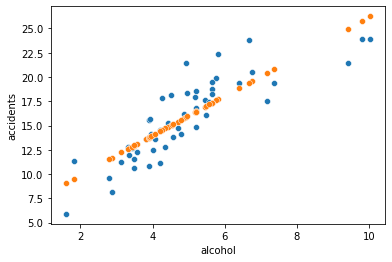

In [21]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes)
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes)

### [ ] Model's Score

#### Calculate the Score

In [22]:
model_lr.score(X=features, y=target)

0.7269492966665405

#### Explain the Score

##### Residuals

In [25]:
df_crashes['residuals'] = df_crashes.accidents - df_crashes.pred_lr

In [28]:
df_crashes.residuals.sum()

1.7053025658242404e-13

In [29]:
df_crashes.residuals.sum().round(2)

0.0

In [32]:
df_crashes['residuals2'] = df_crashes.residuals**2

In [41]:
RSS = df_crashes.residuals2.sum()

##### Target's Variation

In [42]:
TSS = ((df_crashes.accidents - df_crashes.accidents.mean())**2).sum()

##### The Ratio

In [45]:
RSS/TSS

0.2730507033334595

In [46]:
1 - RSS/TSS

0.7269492966665405

In [47]:
model_lr.score(X=features, y=target)

0.7269492966665405

### [ ] Model Interpretation

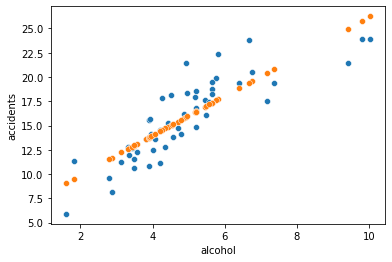

In [83]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes)
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes);

In [84]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.96888653310057,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

In [85]:
model_lr.predict(X=[[4]])

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.98780137])

In [86]:
model_lr.predict(X=[[5]])

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.02030767])

In [87]:
model_lr.predict(X=[[5]]) - model_lr.predict(X=[[4]])

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.0325063])

In [88]:
model_lr.predict(X=[[6]]) - model_lr.predict(X=[[5]])

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.0325063])

## Other Regression Models

### `RandomForestRegressor()` in Python

#### Fit the Model

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
model_rf = RandomForestRegressor()

In [58]:
model_rf.fit(X=features, y=target)

RandomForestRegressor()

#### Calculate Predictions

In [59]:
model_rf.predict(X=features)

array([18.715 , 16.867 , 17.4632, 21.484 , 12.251 , 13.051 , 12.208 ,
       17.461 ,  7.765 , 17.7159, 14.56  , 18.426 , 14.803 , 14.123 ,
       13.939 , 15.197 , 15.652 , 19.893 , 20.776 , 15.637 , 13.204 ,
        9.08  , 14.639 ,  9.654 , 17.316 , 16.671 , 22.141 , 15.7327,
       14.738 , 11.58  , 11.531 , 18.577 , 11.928 , 17.4632, 23.641 ,
       14.881 , 20.559 , 12.603 , 18.463 , 12.817 , 23.641 , 20.468 ,
       18.944 , 19.357 ,  9.601 , 13.4   , 12.396 , 11.22  , 22.129 ,
       14.722 , 17.983 ])

In [60]:
df_crashes['pred_rf'] = model_rf.predict(X=features)

In [61]:
df_crashes

,alcohol,accidents,pred_lr,residuals,residuals2,pred_rf
abbrev,,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111,18.715
AK,4.525,18.1,15.054867,3.045133,9.272834,16.867
...,...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096,14.722
WY,5.568,17.4,17.174771,0.225229,0.050728,17.983


#### Model's Score

In [62]:
model_rf.score(X=features, y=target)

0.9530726330220555

In [63]:
model_lr.score(X=features, y=target)

0.7269492966665405

### `SVR()` in Python

#### Fit the Model

In [64]:
from sklearn.svm import SVR

In [65]:
model_sv = SVR()

In [66]:
model_sv.fit(X=features, y=target)

SVR()

#### Calculate Predictions

In [67]:
model_sv.predict(X=features)

array([18.29570777, 15.18462721, 17.2224187 , 18.6633175 , 12.12434781,
       13.10691581, 13.31612684, 16.21131216, 12.66062465, 17.17537208,
       13.34820949, 19.38920329, 14.91415215, 14.65467023, 14.2131504 ,
       13.41560202, 14.41299448, 16.39752499, 19.4896662 , 15.20002787,
       13.62200798, 11.5390483 , 13.47824339, 11.49818909, 17.87053595,
       17.9144274 , 19.60736085, 17.24170425, 15.73585463, 12.35136579,
       11.784815  , 16.53431108, 12.53373232, 17.2224187 , 19.4773929 ,
       16.01115736, 18.56379706, 12.06891287, 18.30002795, 14.25171609,
       19.59597679, 19.37950461, 18.32794218, 19.29994413, 12.26345665,
       13.84847453, 12.25128025, 12.38791686, 19.48212198, 15.27397732,
       18.1357253 ])

In [68]:
df_crashes['pred_sv'] = model_sv.predict(X=features)

In [69]:
df_crashes

,alcohol,accidents,pred_lr,residuals,residuals2,pred_rf,pred_sv
abbrev,,,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111,18.715,18.295708
AK,4.525,18.1,15.054867,3.045133,9.272834,16.867,15.184627
...,...,...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096,14.722,15.273977
WY,5.568,17.4,17.174771,0.225229,0.050728,17.983,18.135725


#### Model's Score

In [70]:
model_sv.score(X=features, y=target)

0.7083438012012769

In [71]:
model_rf.score(X=features, y=target)

0.9530726330220555

In [72]:
model_lr.score(X=features, y=target)

0.7269492966665405

## [ ] Visualize the 3 Models

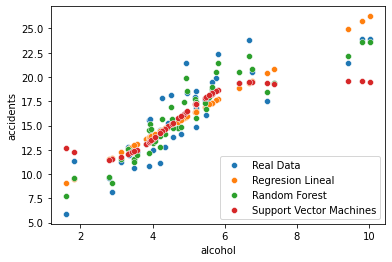

In [75]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes, label='Real Data')
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes, label='Regresion Lineal')
sns.scatterplot(x='alcohol', y='pred_rf', data=df_crashes, label='Random Forest')
sns.scatterplot(x='alcohol', y='pred_sv', data=df_crashes, label='Support Vector Machines');

## Which One Is the Best? Why?

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.